In [17]:
# Check the versions of libraries; Y=amount of loan
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
# scikit-learn
import pandas as pd
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#!pip install sklearn.cross_validation
#from sklearn.cross_validation import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt


Python: 3.6.10 |Anaconda, Inc.| (default, May  7 2020, 19:46:08) [MSC v.1916 64 bit (AMD64)]
scipy: 1.5.0
numpy: 1.19.5
matplotlib: 3.3.2
sklearn: 0.24.1


In [17]:
# Check the versions of libraries; Y=amount of loan
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
# scikit-learn
import pandas as pd
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#!pip install sklearn.cross_validation
#from sklearn.cross_validation import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt


Python: 3.6.10 |Anaconda, Inc.| (default, May  7 2020, 19:46:08) [MSC v.1916 64 bit (AMD64)]
scipy: 1.5.0
numpy: 1.19.5
matplotlib: 3.3.2
sklearn: 0.24.1


In [2]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
...

Ellipsis

In [18]:
# Load dataset
url = "Resources/Full_set2.csv"

Full_set2_df = read_csv(url)


In [19]:
Full_set2_df.head(2)

,Unnamed: 0,Loan-yes,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Unnamed: 0_y,Female,Male,...,1Dependents,2Dependents,3Dependents,Graduate,non_grad,Not self_empl,Self_Employed_1,Rural,Semiurban,Urban
0,0,1,5720,0,110,360,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
1,1,0,3076,1500,126,360,1,1,0,1,...,1,0,0,1,0,1,0,0,0,1


In [20]:
X = Full_set2_df[['ApplicantIncome', 'Credit_History','Male','Married.1','1Dependents','2Dependents','3Dependents','Graduate','Self_Employed_1','Rural','Semiurban','Urban']]
y = Full_set2_df['LoanAmount']

In [21]:
from sklearn import linear_model

In [22]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [23]:
print(regr.coef_)

[ 5.32259811e-03 -1.26553398e+01  4.61965065e-01  1.64466939e+01
  7.15554941e-01  1.48976164e+01  1.92229935e-01  2.01490504e+01
  9.18165331e-01  3.81758996e+00 -4.90050948e-01 -3.32753901e+00]


In [24]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import pvalues
# create X and y
feature_cols = ['ApplicantIncome', 'Credit_History','Female','Male','Unmarried','Married.1','1Dependents','2Dependents','3Dependents','Graduate','non_grad','Self_Employed_1','Rural','Semiurban','Urban']
X = Full_set2_df[feature_cols]
y = Full_set2_df.LoanAmount

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
list(zip(feature_cols, lm2.coef_))

[('ApplicantIncome', 0.005322598113966024),
 ('Credit_History', -12.655339801896373),
 ('Female', -0.23098253255807272),
 ('Male', 0.230982532558067),
 ('Unmarried', -8.22334694962331),
 ('Married.1', 8.223346949623311),
 ('1Dependents', 0.7155549407359599),
 ('2Dependents', 14.89761638428901),
 ('3Dependents', 0.19222993481347567),
 ('Graduate', 10.074525188027605),
 ('non_grad', -10.074525188027604),
 ('Self_Employed_1', 0.9181653314251923),
 ('Rural', 3.8175899568485465),
 ('Semiurban', -0.4900509480620882),
 ('Urban', -3.3275390087864563)]

In [11]:
# print a summary of the fitted model
#!pip install statsmodels
#import statsmodels.formula.api as smf
#lm2.summary()

In [25]:
# Fitting our model with all of our features in X
lm2.fit(X, y)

score = lm2.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.2558254405513729


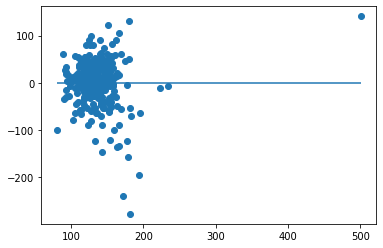

In [26]:
predictions = lm2.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()